<a href="https://colab.research.google.com/github/gaggs/SuperStoreEDA/blob/master/SparksSuperstoreEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import files
uploaded=files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['SampleSuperstore.csv']))

In [5]:
data.head(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.96,2,0.0,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.94,3,0.0,219.5820


In [6]:
data.tail(2)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.60,4,0.0,13.320
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.16,2,0.0,72.948


In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data["Profit"].describe()

count    9994.000000
mean       28.656896
std       234.260108
min     -6599.978000
25%         1.728750
50%         8.666500
75%        29.364000
max      8399.976000
Name: Profit, dtype: float64

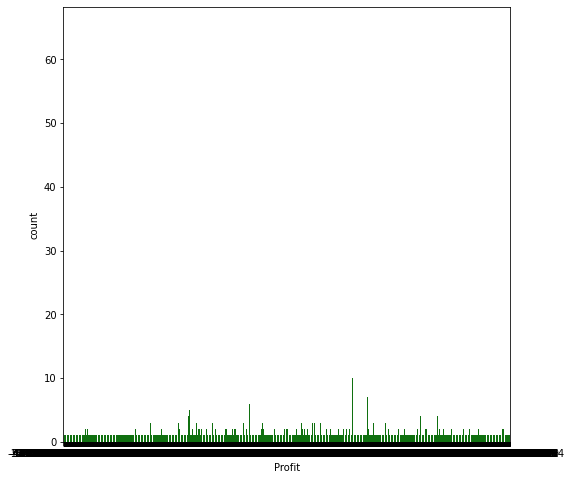

In [10]:
plt.figure(figsize=(8,8))
sns.countplot(data["Profit"],color='g')

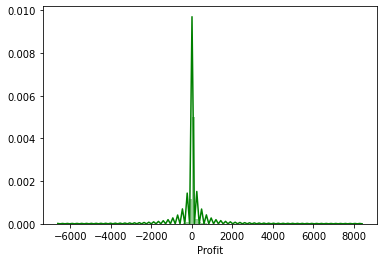

In [11]:
sns.distplot(data['Profit'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [12]:
list(set(data.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [13]:
data_num=data.select_dtypes(include = ['float64', 'int64'])
data_num.head()

,Postal Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f831d20e5f8>,
      dtype=object)

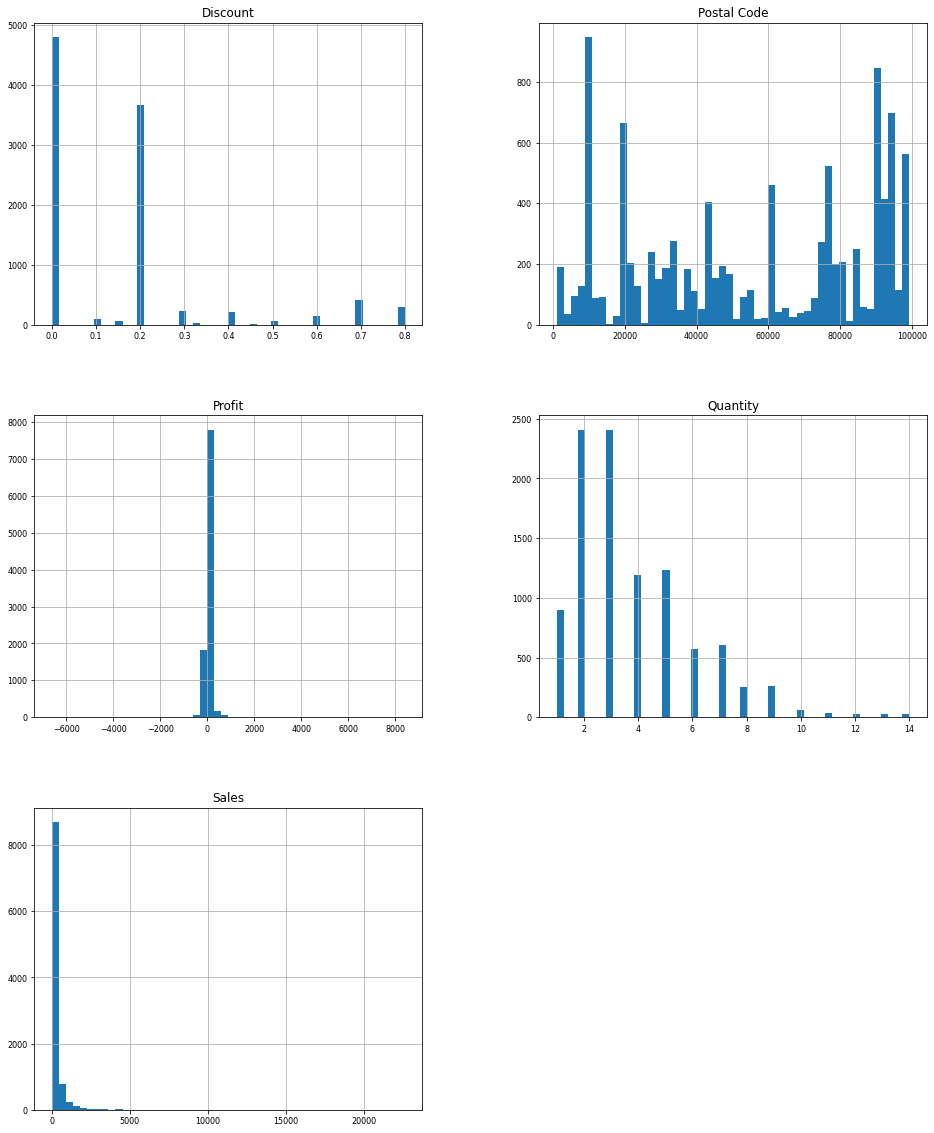

In [14]:
data_num.hist(figsize=(16,20),bins=50,xlabelsize=8,ylabelsize=8)

In [15]:
data_num_corr=data_num.corr()['Profit'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Profit:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Profit:
Sales    0.479064
Name: Profit, dtype: float64


In [16]:
data_num_corr=data_num.corr()['Sales'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Sales:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Sales:
Sales    1.0
Name: Sales, dtype: float64


In [17]:
data_num_corr=data_num.corr()['Discount'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Discount:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Discount:
Discount    1.0
Name: Discount, dtype: float64


In [18]:
data_num_corr=data_num.corr()['Quantity'][:-1]
golden_features_list = data_num_corr[abs(data_num_corr) > 0.4].sort_values(ascending=False)
print("There is {} strongly correlated values with Quantity:\n{}".format(len(golden_features_list), golden_features_list))

There is 1 strongly correlated values with Quantity:
Quantity    1.0
Name: Quantity, dtype: float64


ValueError: ignored

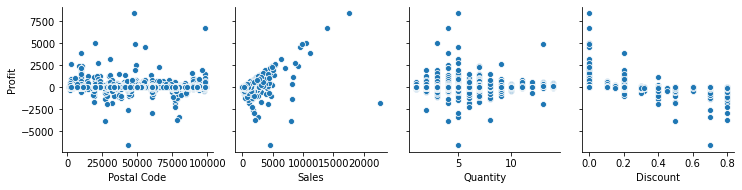

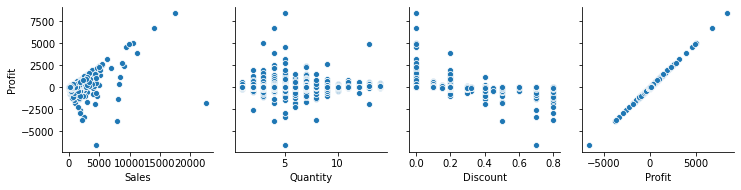

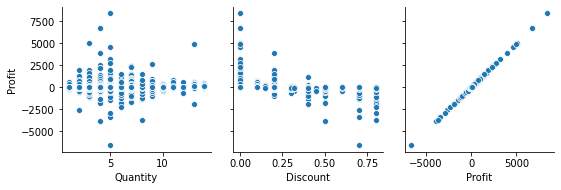

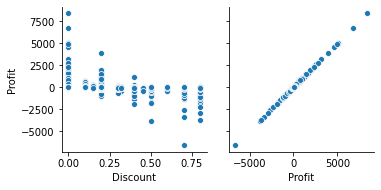

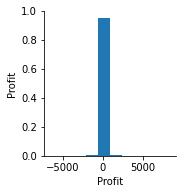

In [19]:
for i in range(0,len(data.columns)):
  sns.pairplot(data=data_num,x_vars=data_num.columns[i:i+4],y_vars=["Profit"])

In [20]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


In [21]:
data_num.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


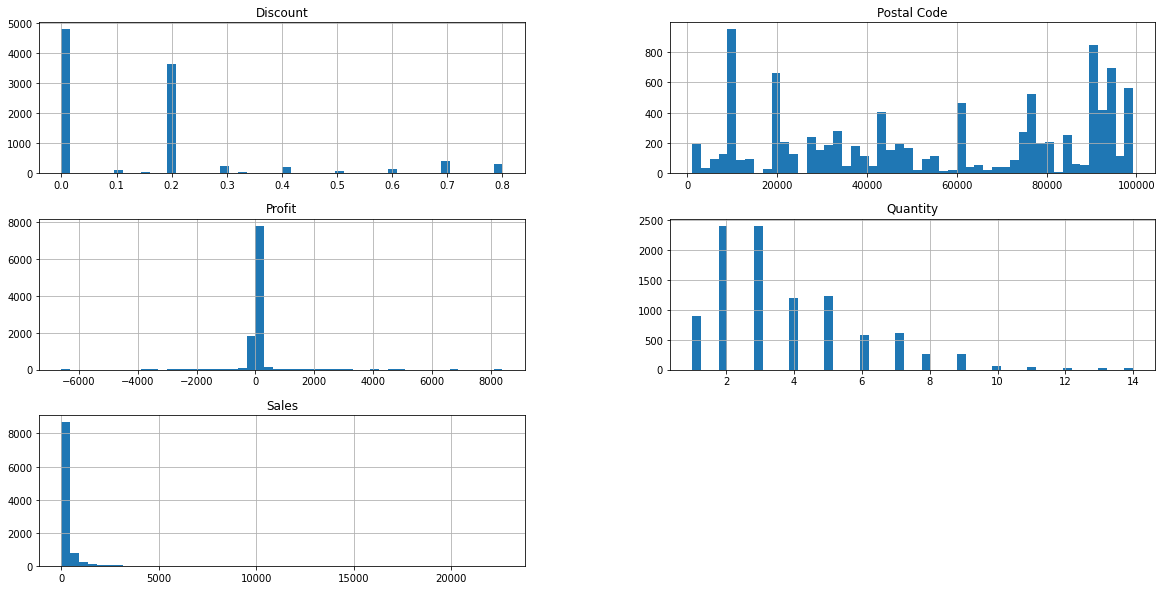

In [22]:
data.hist(bins=50, figsize=(20,10))
plt.show()

In [24]:
data_1=data.corr()

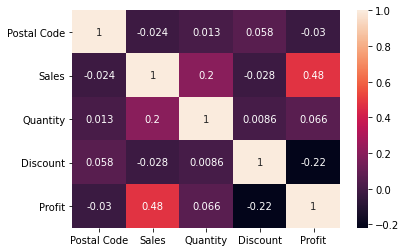

In [25]:
sns.heatmap(data.corr(),xticklabels=data_1.columns,yticklabels=data_1.columns,annot=True)

As Profit and Sales have the highest corelation we will try to identify more about their relationship.

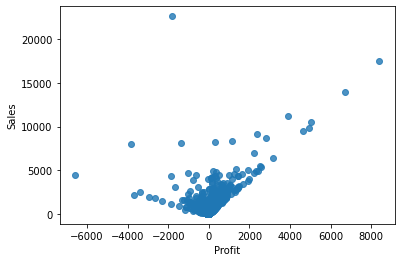

In [26]:
sns.regplot(x='Profit',y='Sales',data=data,fit_reg=False)

We can see in the above plot that as the Sales increase Profit also increases which is pretty natural. Now from here on our focus would be more on how Profit varies with Quantity of Sales.

Text(0, 0.5, 'Sales')

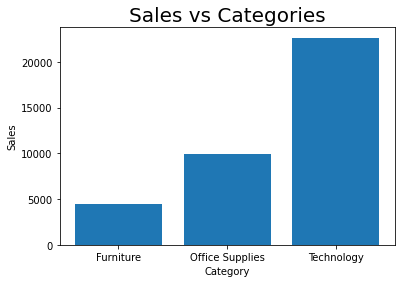

In [27]:
plt.bar('Category','Sales', data=data)
plt.title('Sales vs Categories',size=20)
plt.xlabel('Category')
plt.ylabel('Sales')

In [39]:
tech=data.groupby(["Category"]).sum()
tech

,Postal Code,Sales,Quantity,Discount,Profit
Category,,,,,
Furniture,118196026,741999.7953,8028,368.89,18451.2728
Office Supplies,330772872,719047.0320,22906,947.80,122490.8008
Technology,102603754,836154.0330,6939,244.40,145454.9481


The Sales through Furniture and Office Supplies are close but the margin on Office Supplies is evidently very high as compared to furniture i.e. almost double.

As we can see most of the sales are generated in the Technology category, which in turn is heavily impacting profit in a positive manner.

Now we shall see how the shipping is done for most of the products

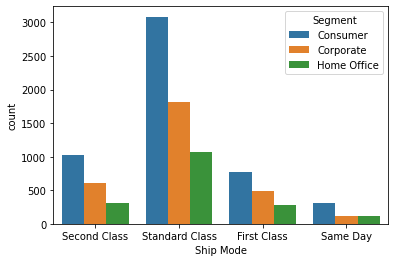

In [31]:
sns.countplot('Ship Mode',data=data, hue='Segment')

In [36]:
Shipping_all=data.groupby(["Ship Mode"]).sum()
Shipping_all

,Postal Code,Sales,Quantity,Discount,Profit
Ship Mode,,,,,
First Class,84229511,3.514284e+05,5693,253.17,48969.8399
Same Day,31242093,1.283631e+05,1960,82.75,15891.7589
Second Class,108192588,4.591936e+05,7423,270.15,57446.6354
Standard Class,327908460,1.358216e+06,22797,955.02,164088.7875


As we can see, a large amount of profit is being generated by the Standard shipping which is not surprising as it is the most chosen by all three segemnts i.e, consumer, home office and corporate.

Now we must explore how different states are contributing to the profits.

In [42]:
state=data.groupby(["State"]).sum()
state

,Postal Code,Sales,Quantity,Discount,Profit
State,,,,,
Alabama,2195669,19510.6400,256,0.00,5786.8253
Arizona,19102126,35282.0010,862,68.00,-3427.9246
Arkansas,4339309,11678.1300,240,0.00,4008.6871
California,184382639,457687.6315,7667,145.60,76381.3871
Colorado,14613828,32108.1180,693,57.60,-6527.8579
Connecticut,531005,13384.3570,281,0.60,3511.4918
Delaware,1896504,27451.0690,367,0.60,9977.3748
District of Columbia,200160,2865.0200,40,0.00,1059.5893
Florida,12640225,89473.7080,1379,114.65,-3399.3017


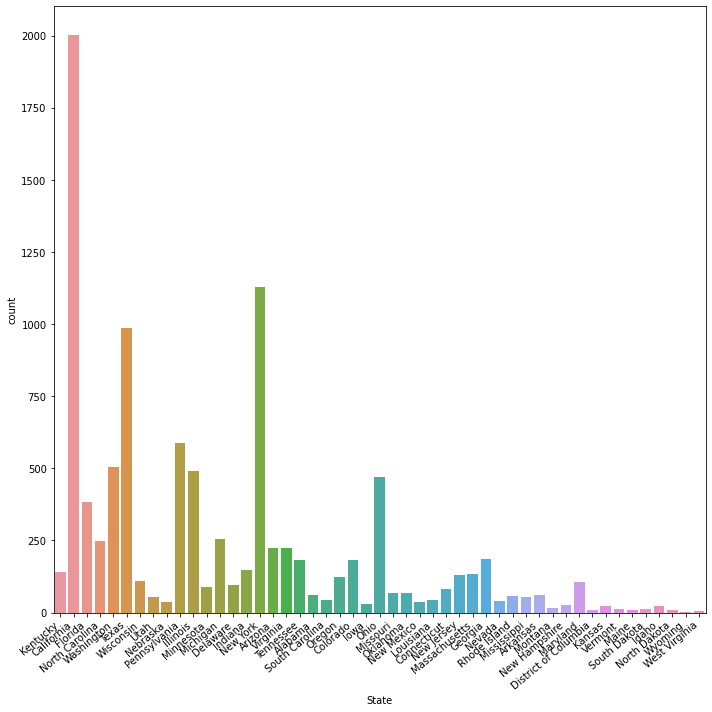

In [52]:
from matplotlib import rcParams

plt.figure(figsize=(10,10))

s=sns.countplot("State",data=data)
s.set_xticklabels(s.get_xticklabels(),rotation=40,ha='right')
plt.tight_layout()
plt.show()

The graph evidently shows California, New York and Texas have the highest counts

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 <a list of 49 Text major ticklabel objects>)

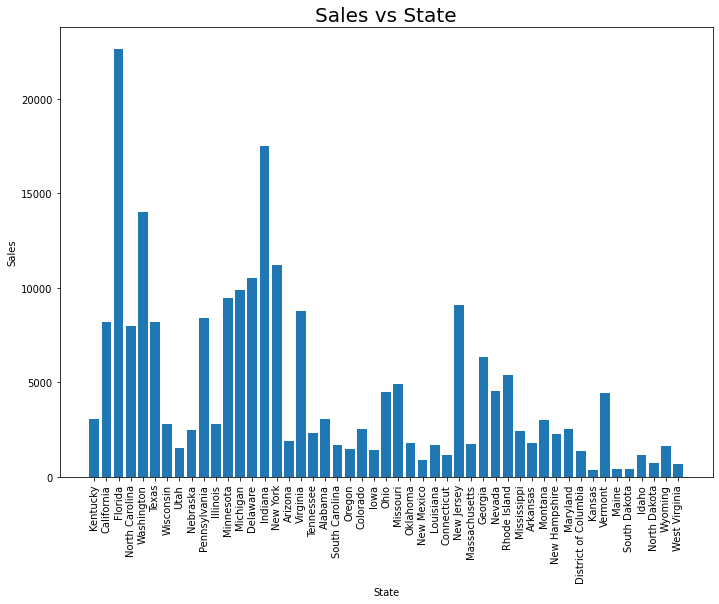

In [62]:
plt.bar('State','Sales', data=data)
plt.title('Sales vs State',size=20)
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation='90')


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 <a list of 49 Text major ticklabel objects>)

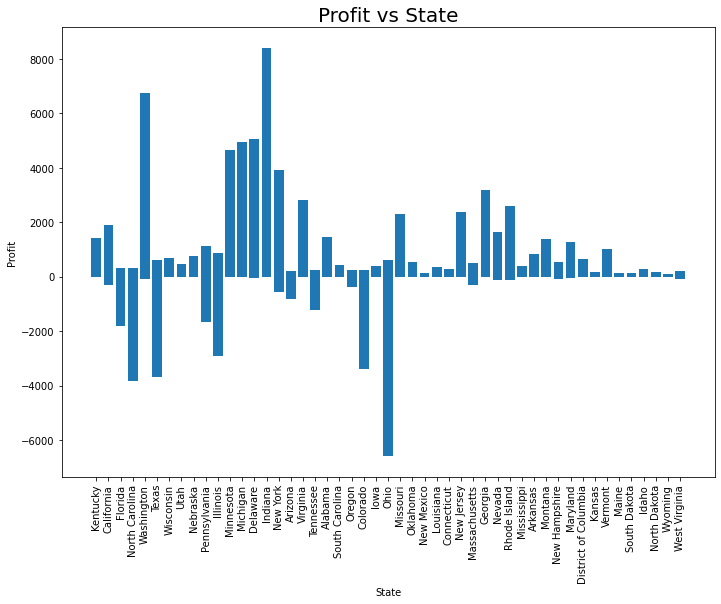

In [61]:
plt.bar('State','Profit', data=data)
plt.title('Profit vs State',size=20)
plt.xlabel('State')
plt.ylabel('Profit')
plt.xticks(rotation='90')

 The state which generated the most amount of profit is Indiana and Florida being the second which is not surprising as the two cities had the highest amount of sales. Ohio is generating profits in negatives.